# Part Training CNN
This part normal file on name assignment01_CNN_train_part.py

In [1]:
# README
# This file will use to access all file in directory and manage about file name for get path

# REFERENCE
# ref01 : https://docs.python.org/3/tutorial/inputoutput.html
# ref02 : https://keras.io/layers/convolutional/
# ref03 : https://keras.io/getting-started/faq/#how-can-i-install-hdf5-or-h5py-to-save-my-models-in-keras

from directory_handle import DirectoryHandle
import image_handle as ImageHandle
import data_handle as DataHandle

import matplotlib.pyplot as plt # Plot image

import numpy as np

# Import Library for CNN 
from keras.models import Sequential
## Part Core Layers
from keras.layers import Dense, Flatten, Dropout
## Part Convolutional Layers
from keras.layers import Conv2D, Conv2DTranspose
## Part Pooling Layers
from keras.layers import MaxPooling2D

Using TensorFlow backend.


In [2]:
# Constant Part
PATH_DATA = "/home/zeabus/Documents/supasan/2019_deep_learning/PokemonData"

In [3]:
# Get all full path to image file and split by label : depth = 1
directory_handle = DirectoryHandle( PATH_DATA )
list_label , list_data = directory_handle.group_data()
print(f'\tData {len(list_label)} groups and {sum([len(data) for data in list_data])} pictures')

	Data 149 groups and 6781 pictures


In [4]:
# Get small size and load image to array prepare result
smallest_size = ImageHandle.min_all_square_size1( list_data )
print(f'Assignment 01 : CNN Will manage by resize image to smallest size {smallest_size} square')
X_all , Y_all = ImageHandle.prepare_label_data( list_label , list_data , smallest_size )
print(f'Assignment 01 : Summary have data {len(Y_all[0])} lable and {len(X_all)} pictures')

Assignment 01 : CNN Will manage by resize image to smallest size 43 square
Assignment 01 : Summary have data 149 lable and 6781 pictures


Example picture index 1143


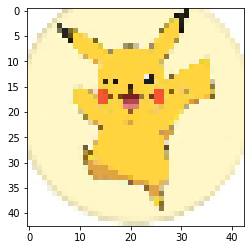

In [5]:
temp_number = np.random.randint( len(X_all) )
print(f'Example picture index {temp_number}')       
plt.imshow( X_all[ temp_number ] )  

In [6]:
# Create Model
model = Sequential()
model.name = "classifier_pokemon"
# Add all layers
## Add First layer is Convolution Layer
model.add( Conv2D( 128 ,
                 kernel_size=3,
                 activation='relu',
                 input_shape=(smallest_size , smallest_size , 3)))
## Add Second layer is Convolution Layer
model.add( Conv2D( 64 , 
                 kernel_size=3,
                 activation='relu') )
## Add Third layer is Pooling Layer
model.add( MaxPooling2D( pool_size=(2,2),
                 data_format='channels_last') )
## Add Forth Layer is Flatten Layer 
### This layer will manage only output shape to one dimension
model.add( Flatten( data_format='channels_last' ) )
## Add Fifth Layer is Fully Connected layer use activation softmax
model.add( Dense( len(list_label), activation='softmax' ) )
# Finish add layers

# Set Model compute loss on patter classifier
model.compile( optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print( model.summary() )

Model: "classifier_pokemon"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 41, 41, 128)       3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 23104)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 149)               3442645   
Total params: 3,520,021
Trainable params: 3,520,021
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.layers[0].trainable

True

In [8]:
( x_train , y_train ) , ( x_test , y_test ) = DataHandle.train_test_split(
    X_all , Y_all , 8 )
print(f'From {len(X_all)} datas split for train {len(x_train)} datas and test {len(x_test)} datas')

From 6781 datas split for train 5934 datas and test 847 datas


In [ ]:
model.fit( [x_train] , [y_train],
         validation_data=( [x_test] , [y_test] ),
         epochs = 100 )

Train on 5934 samples, validate on 847 samples
Epoch 1/100
5934/5934 [==============================] - 68s 11ms/step - loss: 30341336133840705605257396224.0000 - accuracy: 0.0071 - val_loss: 5.0038 - val_accuracy: 0.0094
Epoch 2/100
4128/5934 [===================>..........] - ETA: 20s - loss: 5.0039 - accuracy: 0.0094

In [ ]:
model.predict( [[ X_all[temp_number ] ]])

# Part Training AutoEncoder
This part normal file on name assignment01_autoencoder_train_part.py

In [46]:
# README
# This file will use to access all file in directory and manage about file name for get path

# REFERENCE
# ref01 : https://docs.python.org/3/tutorial/inputoutput.html
# ref02 : https://keras.io/layers/convolutional/
# ref03 : https://keras.io/getting-started/faq/#how-can-i-install-hdf5-or-h5py-to-save-my-models-in-keras

from directory_handle import DirectoryHandle
import image_handle as ImageHandle
import data_handle as DataHandle

import matplotlib.pyplot as plt # Plot image

import numpy as np

# Import Library for CNN 
from keras.models import Sequential
## Part Core Layers
from keras.layers import Dense, Dropout, Flatten
## Part Convolution Layers
from keras.layers import Conv2D, UpSampling2D

In [19]:
# Constant Part
PATH_DATA = "/home/zeabus/Documents/supasan/2019_deep_learning/PokemonData"

In [20]:
# Get all full path to image file and split by label : depth = 1
directory_handle = DirectoryHandle( PATH_DATA )
list_label , list_data = directory_handle.group_data()
print(f'\tData {len(list_label)} groups and {sum([len(data) for data in list_data])} pictures')

	Data 149 groups and 6781 pictures


In [54]:
# Get small size and load image to array prepare result
smallest_size = ImageHandle.min_all_square_size1( list_data ) + 1
print(f'Assignment 01 : CNN Will manage by resize image to smallest size {smallest_size} square')
X_all , Y_all = ImageHandle.prepare_label_data( list_label , list_data , smallest_size )
print(f'Assignment 01 : Summary have data {len(Y_all[0])} lable and {len(X_all)} pictures')

Assignment 01 : CNN Will manage by resize image to smallest size 44 square
Assignment 01 : Summary have data 149 lable and 6781 pictures


Example picture index 4993


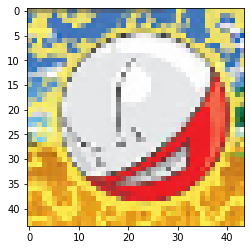

In [60]:
temp_number = np.random.randint( len(X_all) )
print(f'Example picture index {temp_number}')       
plt.imshow( X_all[ temp_number ] )

In [71]:
test = np.array( X_all )
print( (test.astype('float32')/255)[temp_number][0][5] )

[0.49411765 0.5176471  0.40392157]
[0.49411765 0.5176471  0.40392157]


In [59]:
model = Sequential()

model.add( Conv2D( 32,
                  kernel_size=3,
                  activation='relu',
                  padding='same',
                  input_shape=( smallest_size , smallest_size , 3),
                  data_format='channels_last') )
model.add( Conv2D( 16,
                  kernel_size=3,
                  activation='relu',
                  padding='same'))
model.add( MaxPooling2D( pool_size=2,
                  padding='same' ))
model.add( Conv2D( 8,
                  kernel_size=3,
                  activation='relu',
                  padding='same'))
model.add( Conv2D( 16,
                  kernel_size=3,
                  activation='relu',
                  padding='same') )
model.add( UpSampling2D( (2,2) ))
model.add( Conv2D( 32,
                  kernel_size=3,
                  activation='relu',
                  padding='same') )
model.add( Conv2D( 3,
                  kernel_size=3,
                  activation='relu',
                  padding='same') )

print( model.summary() )

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 44, 44, 32)        896       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 44, 44, 16)        4624      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 22, 22, 8)         1160      
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 22, 22, 16)        1168      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 44, 44, 16)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 44, 44, 32)      